# SYDE 556/750 --- Assignment 1
**Student ID: 20854840**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_01/syde556_assignment_01.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

✍ \<YOUR SOLUTION HERE\>

Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.

✍ \<YOUR SOLUTION HERE\>

**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.

In [2]:
# Establish number of neurons

numNeurons = 16

# Generate max firing rate that is uniformly distributed with given freqs

lowFreq = 100
highFreq = 200
numSamplesaMax = numNeurons # Getting the number of neurons as samples
setaMax= np.random.uniform(lowFreq, highFreq, numSamplesaMax)


# print(setaMax) --> ignore this is me testing some kernels stuff


# generate random intercepts (x intercepts b/w given limits)

minIntercept = -0.95
maxIntercept = 0.95
numSamplesintercepts = numNeurons
setIntercept = np.random.uniform(minIntercept, maxIntercept, numSamplesintercepts)

# print(setIntercept) --> ignore this is me testing some kernels stuff



Gain, Bias, and encoder Helper

In [3]:
def gain(aMax, xIntercept, e):
    return aMax / abs(e - xIntercept)

def bias(xIntercept, e, gain):
    return -(gain) * xIntercept * e


def reluEncode(neuron, x):
        rate = max(neuron.a * x * neuron.encoderLimit + neuron.jBias, 0)
        return rate

def RMSE(x, y):
    return np.sqrt(np.mean(np.power(x - y, 2)))


Create the Rectified linear neuron

In [4]:
class ReluNeuron:
    def __init__(self, aMax, xIntercept, id):
        self.id = id
        self.aMax = aMax
        
        self.rate = []
        self.encoderLimit = np.random.choice([-1,1])

        a = gain(aMax, xIntercept, self.encoderLimit)
        self.a = a
        jBias = bias(xIntercept, self.encoderLimit, a)
        self.jBias = jBias

    def rateRelu(self, x):
        return reluEncode(self,x)

    def findRate(self, space):
        for element in space:
            self.rate.append(self.rateRelu(element))

# Create neurons
neurons = []
for i in range(numNeurons):
    neurons.append(ReluNeuron(setaMax[i], setIntercept[i], i))

x = np.linspace(-1,1,30)

for neuron in neurons:
    neuron.findRate(x)

Now for the fun stuff, PLOTTING!!

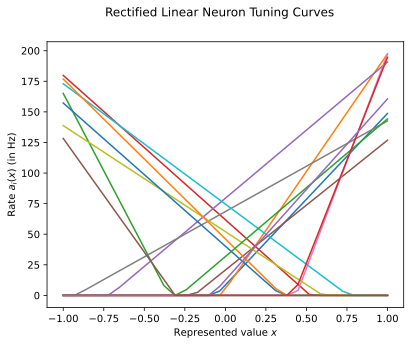

In [5]:
plt.figure()
plt.suptitle("Rectified Linear Neuron Tuning Curves")
for neuron in neurons:
    plt.plot(x, neuron.rate)
plt.xlabel("Represented value $x$")
plt.ylabel("Rate $a_i(x)$ (in Hz)")
plt.show()

**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).

Make an array of activities and inputs and then append the neuron rates and x values. Once that is done, you can use the following equation

In [6]:
activities = []
input = []

for neuron in neurons:
    activities.append(neuron.rate)
    input.append(x)

A = np.array(activities)
X = np.array(input)

# Dot product of equation shown
d = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T[0]

print("---------------------------------------------------------------------------------------------------------")
print("Decoded values =")
print(d)
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Decoded values =
[-5.38720513e-04  3.77547371e-05  2.19770526e-04  5.42989547e-05
 -5.69969002e-05 -2.01652707e-03 -3.87888001e-03  5.75802336e-04
 -4.80992133e-05  2.94114069e-05  1.11907492e-02 -1.37578097e-02
  5.76651957e-03  5.47848475e-03  7.77430520e-04 -2.88763587e-03]
---------------------------------------------------------------------------------------------------------


**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.

Plot for decoded values xHat and expected values x

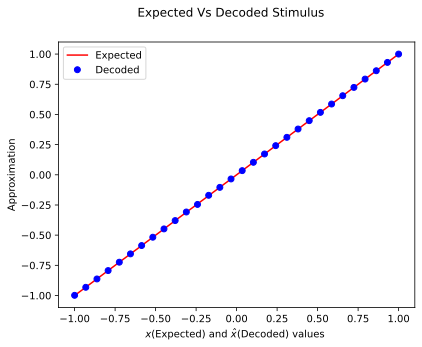

In [7]:
xHat = np.dot(d,A)
#xHat = np.linspace(-1,1,50) --> Figured i dont really need this 
plt.figure()

plt.suptitle("Expected Vs Decoded Stimulus")
plt.plot(x, x, 'r', label='Expected')
plt.plot(x, xHat, "bo", label='Decoded')
plt.xlabel("$x$(Expected) and $\hat x$(Decoded) values ")
plt.ylabel("Approximation")
plt.legend()

Decoded values seem to be aligned with the expected model

Plotting error $e = x - xHat$

Text(0, 0.5, 'Error')

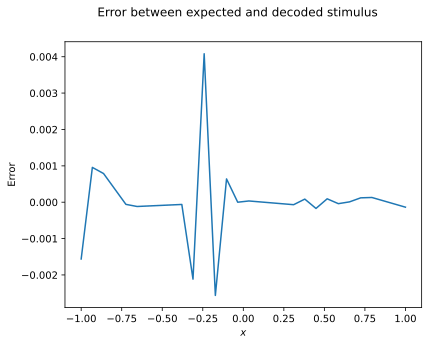

In [8]:
# Calculate error which is the diff b/w x and xHat

error = x - xHat
plt.figure()
plt.suptitle("Error between expected and decoded stimulus")
plt.plot(x, error)
plt.xlabel("$x$")
plt.ylabel("Error")



Calculate the root mean squared error (RMSE)

In [9]:
xRMSEnoise = RMSE(x, xHat)
xRMSEnoise_rounded = np.round(xRMSEnoise, 5)
print("---------------------------------------------")
print("Root Mean Squared Error =", xRMSEnoise_rounded)
print("---------------------------------------------")

---------------------------------------------
Root Mean Squared Error = 0.00104
---------------------------------------------


**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.

In [10]:
# ✍ <YOUR SOLUTION HERE>

**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.

In [11]:
# ✍ <YOUR SOLUTION HERE>

**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.

✍ \<YOUR SOLUTION HERE\>

## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.

In [12]:
# ✍ <YOUR SOLUTION HERE>

**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.

In [13]:
# ✍ <YOUR SOLUTION HERE>

**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

✍ \<YOUR SOLUTION HERE\>

## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a bias $J^\mathrm{bias}$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.

✍ \<YOUR SOLUTION HERE\>

**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.

In [14]:
# ✍ <YOUR SOLUTION HERE>

**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.

In [15]:
# ✍ <YOUR SOLUTION HERE>

# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.

In [16]:
# ✍ <YOUR SOLUTION HERE>

**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.

In [17]:
# ✍ <YOUR SOLUTION HERE>

**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?

✍ \<YOUR SOLUTION HERE\>

## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).

In [18]:
# ✍ <YOUR SOLUTION HERE>

**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.

In [19]:
# ✍ <YOUR SOLUTION HERE>

**c) Discussion.** How do these decoding vectors compare to the encoding vectors?

✍ \<YOUR SOLUTION HERE\>

**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.

In [20]:
# ✍ <YOUR SOLUTION HERE>

**e) Using encoders as decoders.** Repeat part d) but use the *encoders* as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.

In [21]:
# ✍ <YOUR SOLUTION HERE>

**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?

✍ \<YOUR SOLUTION HERE\>